# Libraries

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing

# Data Extraction

Se carga el archivo y se hace una visualización.

In [ ]:

data_titanic = pd.read_csv("data_titanic.csv")
table = tabulate(data_titanic, headers='keys', tablefmt='fancy_grid')
print(table)

╒═════╤═══════════════╤════════════╤══════════╤════════════════════════════════════════════════════════════════════════════════════╤════════╤════════╤═════════╤═════════╤════════════════════╤══════════╤═════════════════╤════════════╕
│     │   PassengerId │   Survived │   Pclass │ Name                                                                               │ Sex    │    Age │   SibSp │   Parch │ Ticket             │     Fare │ Cabin           │ Embarked   │
╞═════╪═══════════════╪════════════╪══════════╪════════════════════════════════════════════════════════════════════════════════════╪════════╪════════╪═════════╪═════════╪════════════════════╪══════════╪═════════════════╪════════════╡
│   0 │             1 │          0 │        3 │ Braund, Mr. Owen Harris                                                            │ male   │  22    │       1 │       0 │ A/5 21171          │   7.25   │ nan             │ S          │
├─────┼───────────────┼────────────┼──────────┼─────────────────

# Dataset Characteristics


Análisis de las características de los datos: número de columnas, número de filas, valores nulos que puedan causar ruido.

In [ ]:
data_titanic.info() # DataSet information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_titanic.shape # Shape

(891, 12)

In [ ]:
data_titanic.describe() # Statistics Analysis

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_titanic.head() # Statistics Analysis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_titanic.isnull().sum() # Null Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Eliminamos las columas que consideramos menos importantes o no relevantes

In [ ]:
data_titanic = data_titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])

Visualizamos los datos

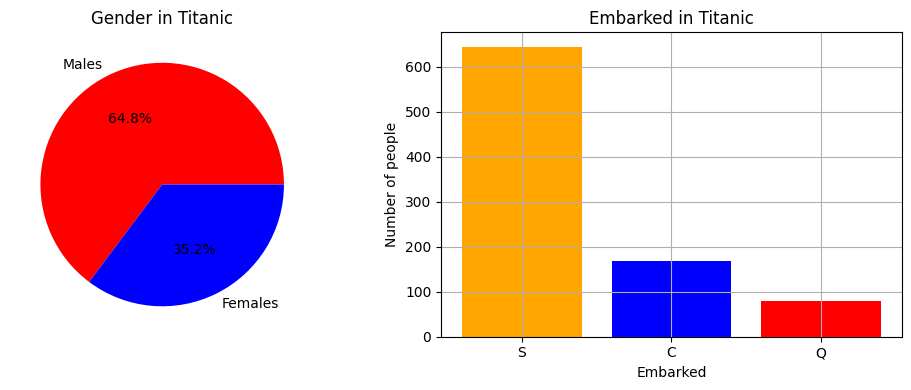

In [ ]:
data_titanic['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data_titanic['Embarked'].replace(['S', 'C', 'Q'],
                        [0, 1, 2], inplace=True)
data_titanic.apply (pd.to_numeric, errors='coerce')
df = data_titanic

h = 0
m = 0
s = 0
c = 0
q = 0
categorias1 = ['Males', 'Females']
colores1 = ['red','blue']
categorias2 = ['S','C','Q']
colores2 = ['orange','blue','red']
for i,j in zip(data_titanic['Sex'],data_titanic['Embarked']):
  if i:
    m += 1
  else:
    h += 1
  if j == 0:
    s += 1
  elif j == 1:
    c += 1
  else:
    q = q + 1
sexo = [h,m]
emb = [s,c,q]
# Create the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# First pie chart for gender
axes[0].pie(sexo, labels=categorias1, colors=colores1, autopct='%.1f%%')
axes[0].set_title('Gender in Titanic')
# Segundo gráfico de barras
axes[1].bar(categorias2, emb, color=colores2)
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('Number of people')
axes[1].set_title('Embarked in Titanic')
axes[1].grid()
# Ajustar el espaciado entre los subplots
plt.tight_layout()
# Mostrar los gráficos
plt.show()

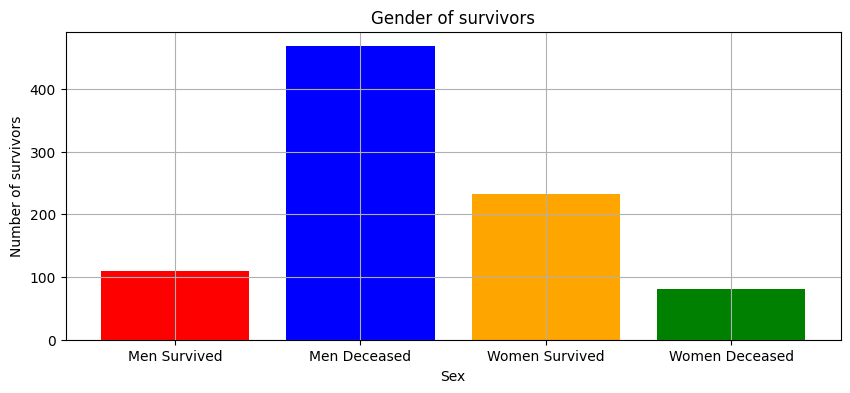

In [ ]:
df2 = df.dropna()
category = ['Men Survived', 'Men Deceased', 'Women Survived', 'Women Deceased']
hv = 0
hm = 0
mv = 0
mm = 0
colors = ['red','blue','orange','green']
for i,j in zip(data_titanic['Sex'],data_titanic['Survived']):
  if i == 0 and j == 1:
    hv = hv + 1
  elif  i == 0 and j == 0:
    hm =hm + 1
  elif  i == 1 and j == 1:
    mv =mv + 1
  elif  i == 1 and j == 0:
    mm = mm+1
data = [hv,hm,mv,mm]
# Crear la figura con subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
# Primer gráfico de barras
axes.bar(category, data, color=colors)
axes.set_xlabel('Sex')
axes.set_ylabel('Number of survivors')
axes.set_title('Gender of survivors')
axes.grid()


[ 0.42  20.125 28.    38.    80.   ]


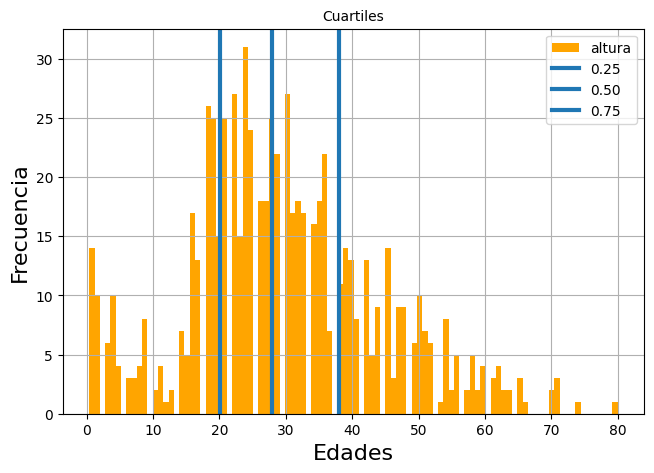






[ 0.42 19.   25.   31.8  41.   80.  ]


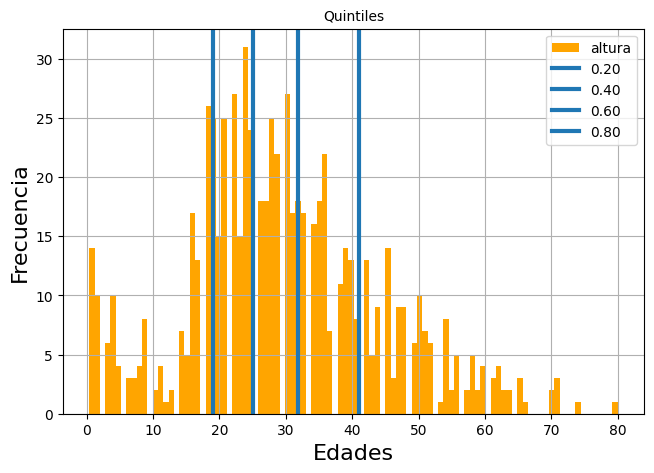

In [ ]:
data = data_titanic['Age'].sort_values()
data_cleaned = data.dropna()

x = np.quantile(data_cleaned, [0, 1/3, 2/3, 1])

cuantiles = [(4, "Cuartiles"),(5, "Quintiles")]

cortes = []
for cuantil in cuantiles:
    corte = []
    valor = 0
    for i in range(cuantil[0]-1):
        valor += 1/cuantil[0]
        corte.append(valor)
    cortes.append(corte)
for i in range(len(cuantiles)):
    plt.figure(figsize=(7.5, 5))
    plt.title(cuantiles[i][1], size=10)
    plt.ylabel("Frecuencia", size=16)
    plt.xlabel("Edades", size=16)
    plt.hist(data_cleaned, 100, label="altura", color="orange")
    plt.grid()
    print(np.quantile(data_cleaned, [0] + cortes[i] + [1]))
    for corte in cortes[i]:
        plt.axvline(x = np.quantile(data_cleaned, corte), label="%.2f" % corte, linewidth=3)
    plt.legend()
    plt.show()
    print("\n"*4)


Eliminamos todas las filas con datos nulos

In [ ]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

Hacemos un análisis de correlación para identificar qué variables están más ligadas a sobrevivir

<Axes: >

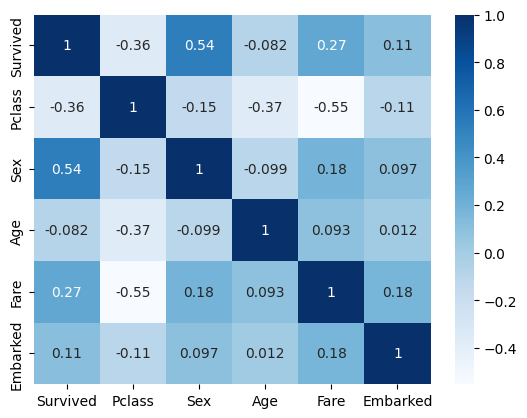

In [ ]:
corr = df2.corr()
sb.heatmap(corr, cmap = 'Blues', annot = True)